# GA Data Science (DAT18) - Lab 13
## Pair Programming

### Heart Disease Dataset
ref: [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

#### Features

    Dataset has 76 total attributes - 14 attributes are used:
    1. #3 (age)
    2. #4 (sex)
    3. #9 (cp)
    4. #10 (trestbps)
    5. #12 (chol)
    6. #16 (fbs)
    7. #19 (restecg)
    8. #32 (thalach)
    9. #38 (exang)
    10. #40 (oldpeak)
    11. #41 (slope)
    12. #44 (ca)
    13. #51 (thal)
    14. #58 (num) (the predicted attribute - 0 is healthy and 1,2,3,4 indicate heart disease) 

In [1]:
heart_disease_file = '../data/heart_disease.csv'

### Class Exercise: Implement Random Forest

#### Import the dataset into a pandas dataframe:

Note: You'll have to manually add column labels


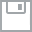
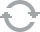
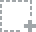
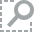
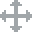
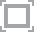
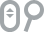
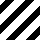
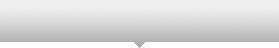
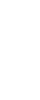
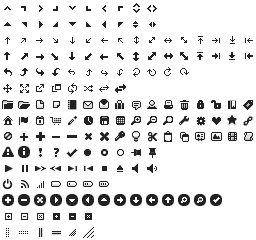
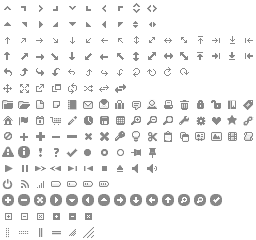
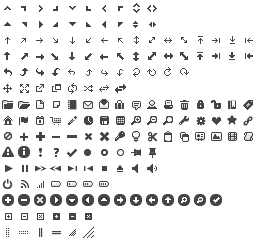
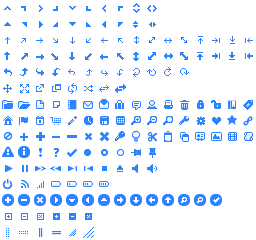
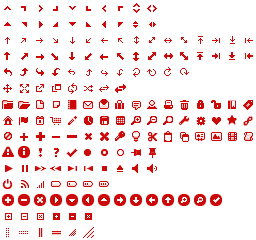
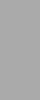
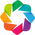
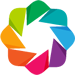

In [20]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

from bokeh.plotting import figure,gridplot,show,output_notebook
from bokeh.models import Range1d
output_notebook()

import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
dbColumns = 'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num'
dbColumns = dbColumns.split(",")

heart = pd.read_csv('../data/heart_disease.csv',names = dbColumns)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Prepare and validate the data:

Investigate the data and check for missing values - we've used .info() before:

In [42]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 35.5+ KB


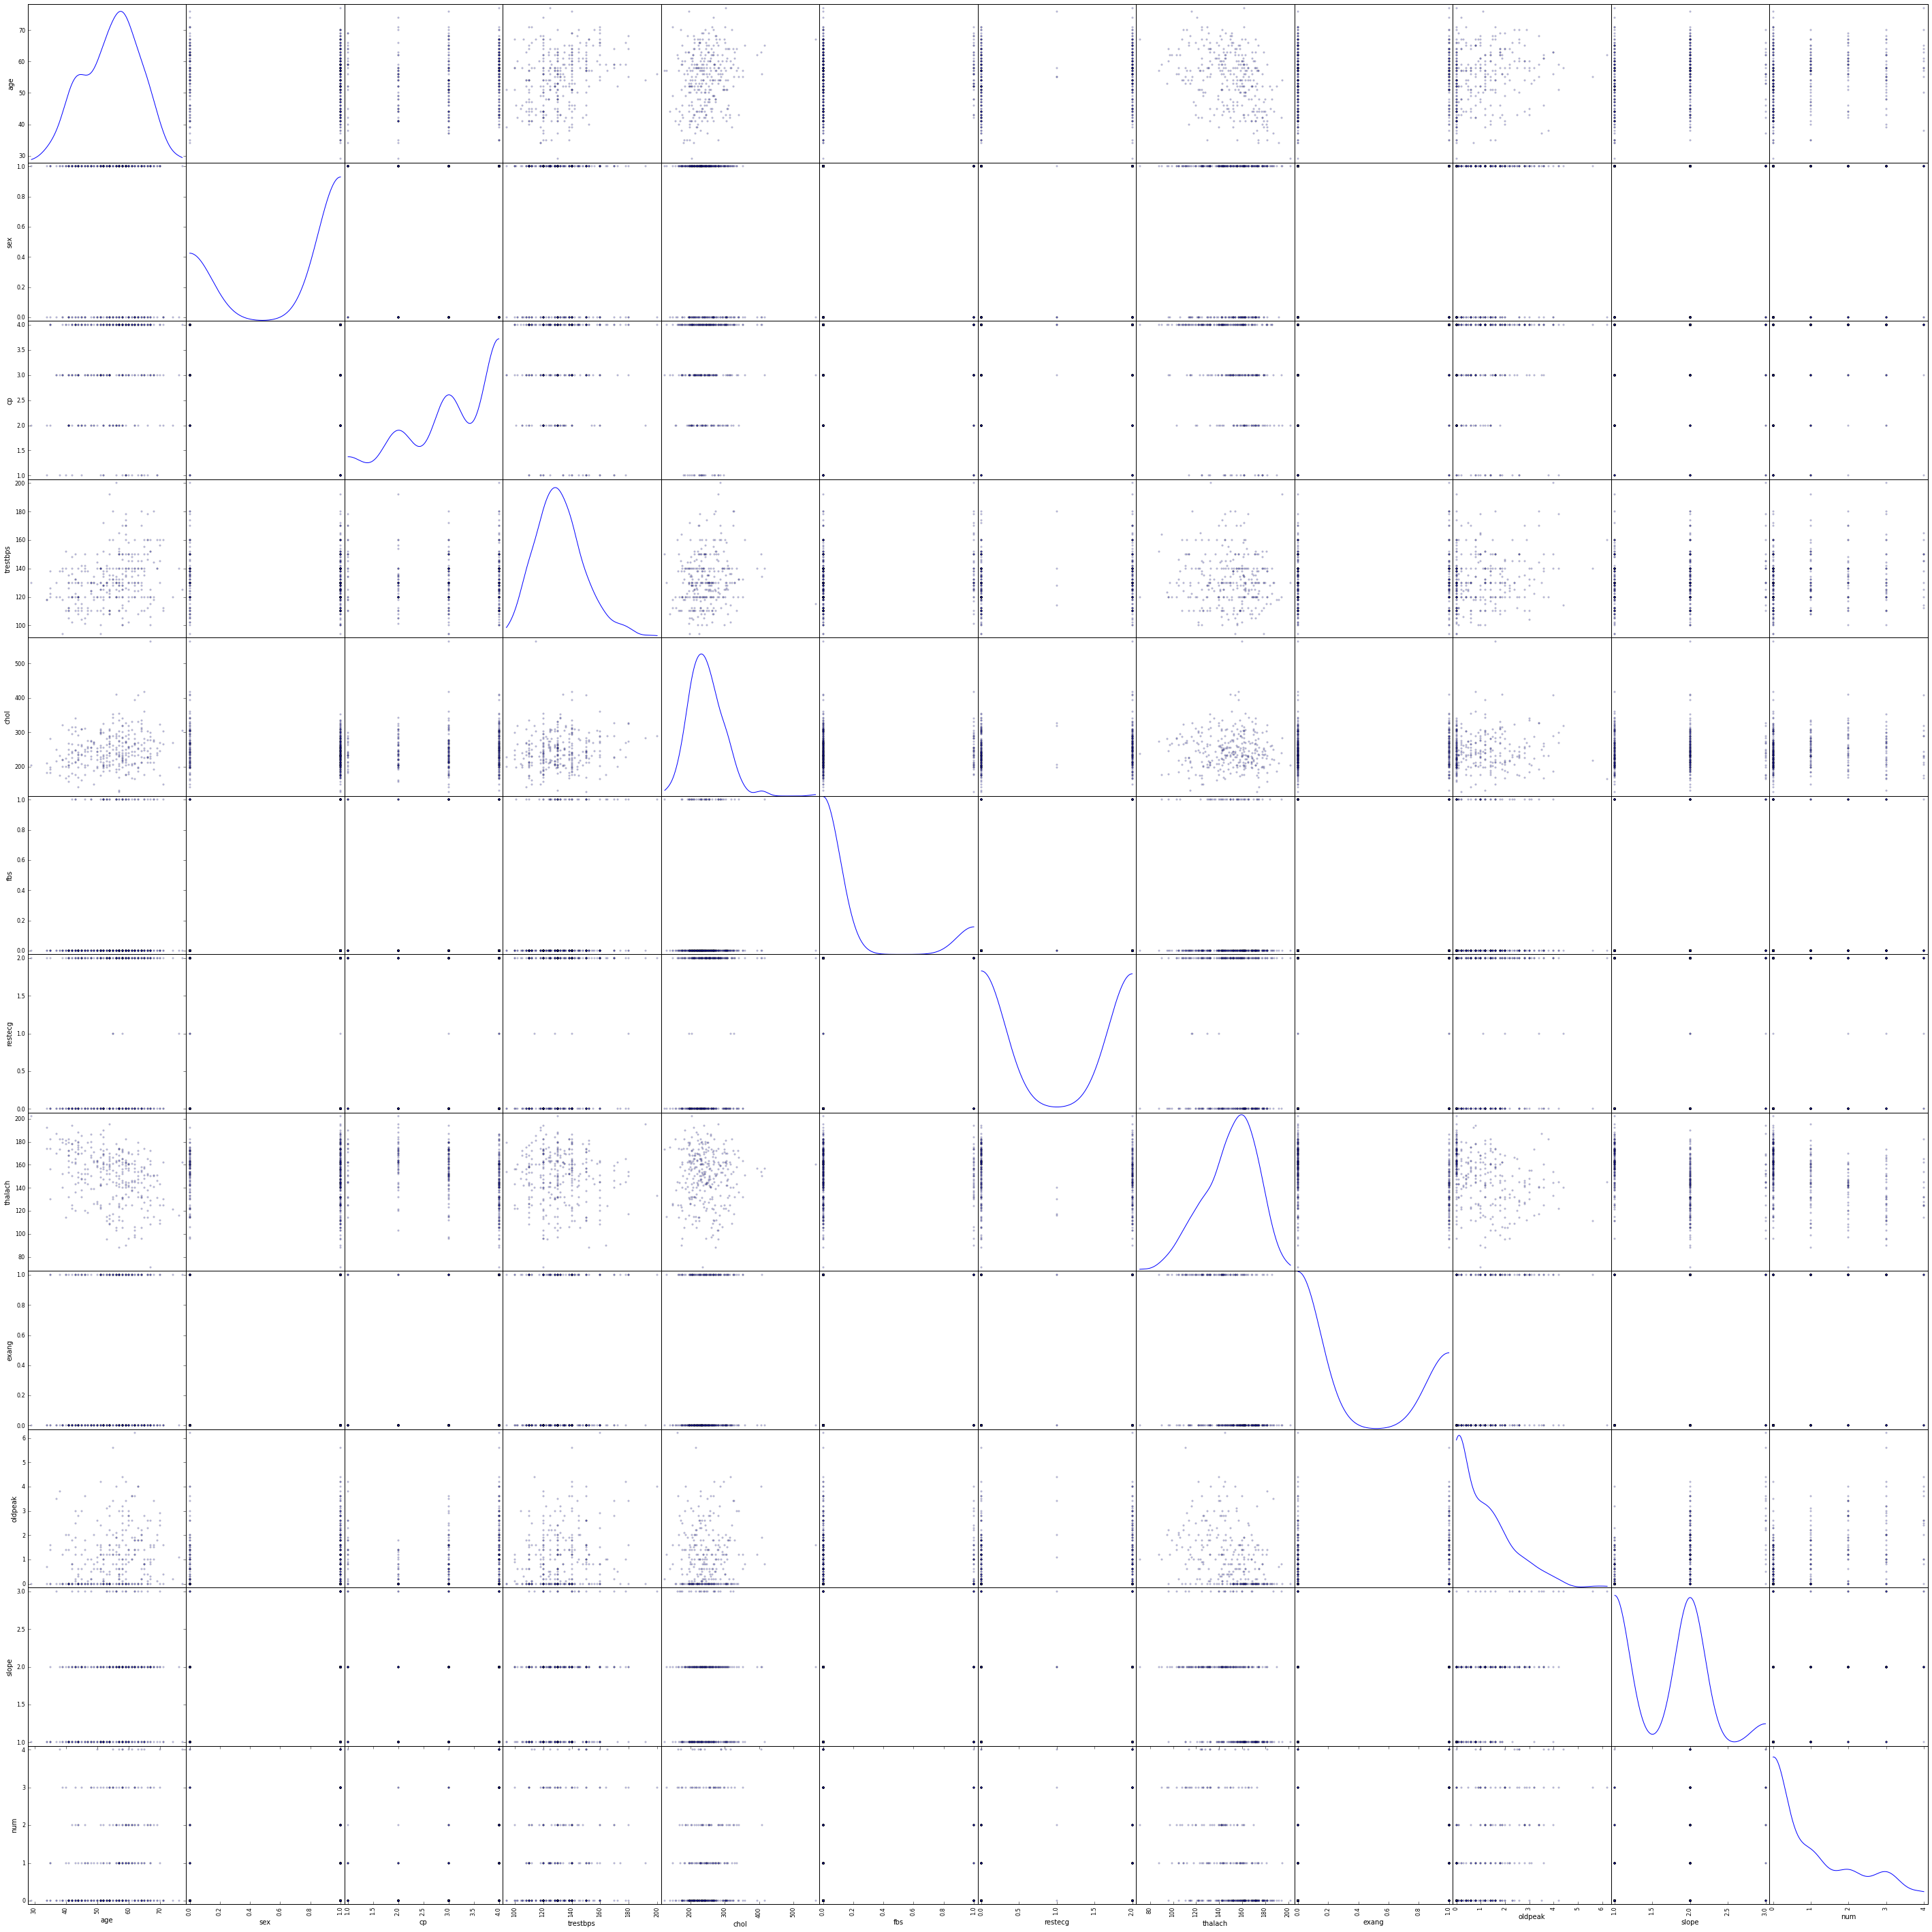

In [43]:
from pandas.tools.plotting import scatter_matrix
fig = plt.figure(figsize=(50,50))
_ = scatter_matrix(heart, alpha=0.2, figsize=(50, 50), diagonal='kde')

In [73]:
print heart.thal.unique()
print heart.ca.unique()

['6.0' '3.0' '7.0' 3.0]
['0.0' '3.0' '2.0' '1.0' 0]


In [57]:
heart.ca.mode()

0    0.0
dtype: object

In [70]:
heart.thal.mode()

0    3.0
dtype: object

In [75]:
heart.ca = heart.ca.replace('?', 0).astype(float)
heart.thal = heart.thal.replace('?',3.0).astype(float)

In [62]:
heart.ca = heart.ca.str.replace("?",heart.ca.mode()).astype(int)
for val in heart.ca:
    if val == '?':
        print 'yes'

# heart['ca'] = heart['ca'].apply(lambda x : heart.ca.mode() if heart.ca is '?' else x)
# heart['thal'] = heart['thal'].apply(lambda x : heart.thal.mode() if heart.thal is '?' else x)

#DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)

yes
yes
yes
yes


In [76]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 35.5 KB


#### Clean the data to ensure it can be used in a random forest algorithm

#### Select Features and convert Target to Boolean Class for Heart Disease (i.e., values 1, 2, 3 and 4 all indicate heart disease)

In [78]:
heart.num = heart.num.apply(lambda x: 1 if x > 0 else 0)
heart.num.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

In [79]:
target = heart.num
features = heart.drop()

ValueError: labels ['num'] not contained in axis

#### Build the model and score with cross-validation

#### How important are the various features?

#### Plot Feature importances

#### Bonus: Repeat the classification with Support Vector Machine